<a href="https://colab.research.google.com/github/camila-galindo/eda-teraverso/blob/main/Tera_Challenge_Teraverso_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the Python libraries

In [1]:
import pandas as pd #library for data manipulation and analysis.
import numpy as np #library for scientific computing with Python.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = '/content/drive/MyDrive/Educação - Cursos/Tera - Data Analytics/Desafio Tera - Analise Exploratória de dados Teraverso/dataset1.csv'

In [4]:
df = pd.read_csv(file_path, encoding='latin-1')

## Unvariate analysis

### First sight to the dataset

In [5]:
df.head()

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,NaN,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,NaN,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,4,Wii Sports Resort,NaN,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,"1,0",31.37


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Id               106 non-null    int64 
 1   Name             105 non-null    object
 2   Platform         97 non-null     object
 3   Year_of_Release  105 non-null    object
 4   Genre            105 non-null    object
 5   Publisher        105 non-null    object
 6   NA_Sales         105 non-null    object
 7   EU_Sales         105 non-null    object
 8   JP_Sales         101 non-null    object
 9   Other_Sales      105 non-null    object
 10  Global_Sales     77 non-null     object
dtypes: int64(1), object(10)
memory usage: 9.2+ KB


**Notes:**
- The `Id` column is full filled.
- `Year_of_Release` should be a object?
- If `Global_Sales` is the sum of all sales, should have null values?

In [7]:
df.isna().sum()

,0
Id,0
Name,1
Platform,9
Year_of_Release,1
Genre,1
Publisher,1
NA_Sales,1
EU_Sales,1
JP_Sales,5
Other_Sales,1


In [8]:
df.isna().sum()/len(df)*100

,0
Id,0.000000
Name,0.943396
Platform,8.490566
Year_of_Release,0.943396
Genre,0.943396
Publisher,0.943396
NA_Sales,0.943396
EU_Sales,0.943396
JP_Sales,4.716981
Other_Sales,0.943396


In [9]:
df[df.isnull().any(axis=1)]

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,NaN,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
2,3,Mario Kart Wii,NaN,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,4,Wii Sports Resort,NaN,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
7,8,Wii Play,NaN,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92
8,9,New Super Mario Bros. Wii,NaN,2009,Platform,Nintendo,14.44,6.94,4.7,2.24,28.32
10,11,Nintendogs,DS,2005,Simulation,Ñintendo,9.05,10.95,1.93,2.74,NaN
13,14,Wii Fit,NaN,2007,Sports,Nintendo,8.92,8.03,3.6,2.15,22.7
15,16,Wii Fit Plus,NaN,2009,Sports,Nintendo,9.01,8.49,2.53,1.77,"21,79"
21,21,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.38,4.46,6.04,1.36,NaN
22,22,Super Mario Land,GB,1989,Platform,Nintendo,10.83,2.71,4.18,0.42,NaN


**Notas:**
- Podemos encontrar um padrão para preencher os nomes das plataformas que estão nulos?

In [10]:
df['Id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 106 entries, 0 to 105
Series name: Id
Non-Null Count  Dtype
--------------  -----
106 non-null    int64
dtypes: int64(1)
memory usage: 976.0 bytes


In [11]:
sorted(df['Name'].unique().astype(str))

['Animal Crossing: New Leaf',
 'Animal Crossing: Wild World',
 'Brain Age 2: More Training in Minutes a Day',
 'Brain Age: Train Your Brain in Minutes a Day',
 'Call of Duty 4: Modern Warfare',
 'Call of Duty: Advanced Warfare',
 'Call of Duty: Black Ops',
 'Call of Duty: Black Ops 3',
 'Call of Duty: Black Ops II',
 'Call of Duty: Ghosts',
 'Call of Duty: Modern Warfare 2',
 'Call of Duty: Modern Warfare 3',
 'Crash Bandicoot 2: Cortex Strikes Back',
 'Donkey Kong Country',
 'Duck Hunt',
 'FIFA 16',
 'FIFA 17',
 'FIFA Soccer 13',
 'Final Fantasy VII',
 'Final Fantasy VIII',
 'Final Fantasy X',
 'GoldenEye 007',
 'Gran Turismo',
 'Gran Turismo 2',
 'Gran Turismo 3: A-Spec',
 'Gran Turismo 4',
 'Gran Turismo 5',
 'Grand Theft Auto III',
 'Grand Theft Auto IV',
 'Grand Theft Auto V',
 'Grand Theft Auto: Liberty City Stories',
 'Grand Theft Auto: San Andreas',
 'Grand Theft Auto: Vice City',
 'Halo 2',
 'Halo 3',
 'Halo 4',
 'Halo: Reach',
 'Just Dance 2',
 'Just Dance 3',
 'Kinect Advent

In [12]:
df['Platform'].unique()

array([nan, 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA', 'PS4',
       '3DS', 'Wii', 'X3600000', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP',
       'XOne'], dtype=object)

In [13]:
df['Publisher'].unique()

array(['Nintendo', 'Ñintendo', 'Microsoft Game Studios',
       'Take-Two Interactive', 'Sony Computer Entertainment',
       'Activision', 'NINTENDO', 'Ubisoft', 'nintendo',
       'Bethesda Softworks', 'Electronic Arts', nan, 'Sega', 'SquareSoft',
       'Atari'], dtype=object)

In [14]:
df['Year_of_Release'].unique()

array(['2006', '1985', '2008', '2009', '1996', '1989', '1984', '2005',
       '1999', '2007', '2010', '2013', '2004', '1990', '1988',
       '9/17/2013', '2002', '2001', '2011', '1998', '2015', '20100',
       '2012', '2014', '12004', '1992', '1997', '1993', '3007', '1994',
       '1804', nan, '1982', '1948', '2016'], dtype=object)

In [15]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure', nan],
      dtype=object)

### Data cleaning

#### Year_of_Release

In [16]:
df['Year_of_Release'].replace('9/17/2013', '2013', inplace=True)

<ipython-input-16-11f4eb81a3cc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year_of_Release'].replace('9/17/2013', '2013', inplace=True)


In [17]:
df['Year_of_Release'].fillna(0, inplace=True)

<ipython-input-17-1e18b86d63d1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year_of_Release'].fillna(0, inplace=True)


In [18]:
df[df['Year_of_Release'].isnull()]

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


#### Genre

In [19]:
df['Genre'].fillna('Not_informed', inplace=True)
df['Genre'].unique()

<ipython-input-19-f9eadb0b068d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Genre'].fillna('Not_informed', inplace=True)


array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Not_informed'], dtype=object)

<Axes: xlabel='Genre'>

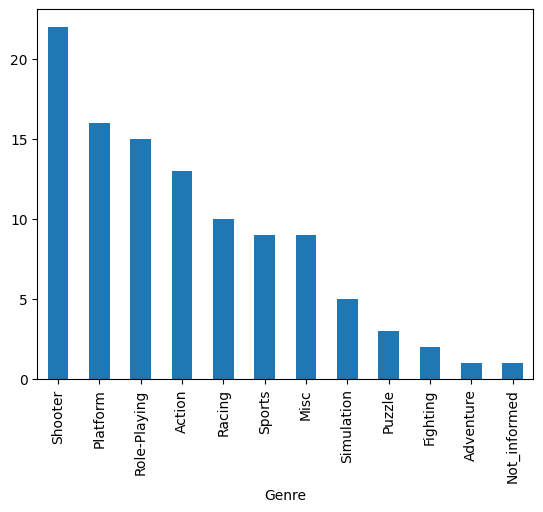

In [20]:
df['Genre'].value_counts().plot(kind="bar")

#### Publisher

In [21]:
df['Publisher'].replace('Ñintendo', 'Nintendo', inplace=True)

<ipython-input-21-6b17cfd6d116>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Publisher'].replace('Ñintendo', 'Nintendo', inplace=True)


In [22]:
df['Publisher'].replace('NINTENDO', 'Nintendo', inplace=True)

<ipython-input-22-9a2d32d2e2e2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Publisher'].replace('NINTENDO', 'Nintendo', inplace=True)


In [23]:
df['Publisher'].replace('nintendo', 'Nintendo', inplace=True)

<ipython-input-23-9bbbc690f521>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Publisher'].replace('nintendo', 'Nintendo', inplace=True)


In [24]:
df['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', nan, 'Sega', 'SquareSoft',
       'Atari'], dtype=object)

<Axes: xlabel='Publisher'>

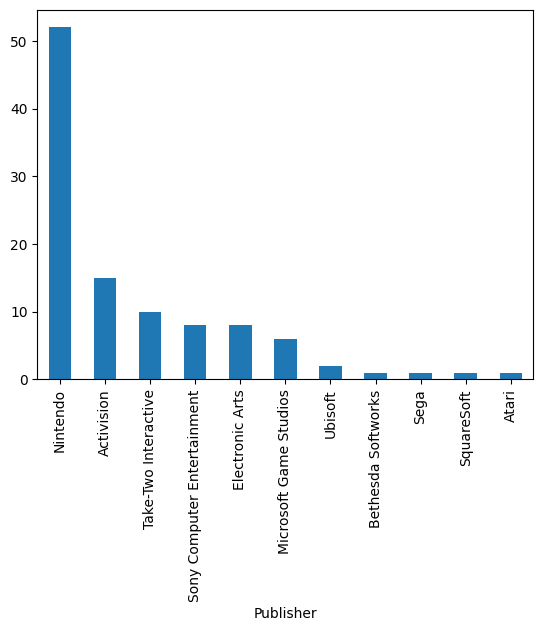

In [25]:
df['Publisher'].value_counts().plot(kind="bar")

#### Global_Sales

In [26]:
pd.set_option('display.max_rows', None)

In [27]:
df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].head(10)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,41.36,28.96,3.77,8.45,82.53
1,29.08,3.58,6.81,0.77,40.24
2,15.68,12.76,3.79,3.29,35.52
3,15.61,10.93,3.28,2.95,32.77
4,11.27,8.89,10.22,"1,0",31.37
5,23.2,2.26,4.22,0.58,30.26
6,11.28,9.14,6.5,2.88,29.8
7,13.96,9.18,2.93,2.84,28.92
8,14.44,6.94,4.7,2.24,28.32
9,26.93,0.63,0.28,0.47,28.31


In [28]:
df['NA_Sales'].fillna(0, inplace=True)
df['EU_Sales'].fillna(0, inplace=True)
df['JP_Sales'].fillna(0, inplace=True)
df['Other_Sales'].fillna(0, inplace=True)
df['Global_Sales'].fillna(0, inplace=True)

<ipython-input-28-64165be9c7a1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NA_Sales'].fillna(0, inplace=True)
<ipython-input-28-64165be9c7a1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

In [29]:
df['NA_Sales'] = df['NA_Sales'].apply(lambda x: float(str(x).replace(',', '.')) if isinstance(x, str) else x).round(2)
df['EU_Sales'] = df['EU_Sales'].apply(lambda x: float(str(x).replace(',', '.')) if isinstance(x, str) else x).round(2)
df['JP_Sales'] = df['JP_Sales'].apply(lambda x: float(str(x).replace(',', '.')) if isinstance(x, str) else x).round(2)
df['Other_Sales'] = df['Other_Sales'].apply(lambda x: float(str(x).replace(',', '.')) if isinstance(x, str) else x).round(2)
df['Global_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

#### Geral

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               106 non-null    int64  
 1   Name             105 non-null    object 
 2   Platform         97 non-null     object 
 3   Year_of_Release  106 non-null    object 
 4   Genre            106 non-null    object 
 5   Publisher        105 non-null    object 
 6   NA_Sales         106 non-null    float64
 7   EU_Sales         106 non-null    float64
 8   JP_Sales         106 non-null    float64
 9   Other_Sales      106 non-null    float64
 10  Global_Sales     106 non-null    float64
dtypes: float64(5), int64(1), object(5)
memory usage: 9.2+ KB


In [31]:
df[df.isnull().any(axis=1)]

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,NaN,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54
2,3,Mario Kart Wii,NaN,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,4,Wii Sports Resort,NaN,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
7,8,Wii Play,NaN,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.91
8,9,New Super Mario Bros. Wii,NaN,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32
13,14,Wii Fit,NaN,2007,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70
15,16,Wii Fit Plus,NaN,2009,Sports,Nintendo,9.01,8.49,2.53,1.77,21.80
83,80,Wii Party,NaN,2010,Misc,Nintendo,1.75,3.47,2.49,0.67,8.38
87,83,NaN,NaN,0,Not_informed,NaN,0.00,0.00,0.00,0.00,0.00


In [32]:
df1 = df.drop(df[df['Id'] == 83].index)

In [33]:
df1[df1.isnull().any(axis=1)]

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,NaN,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54
2,3,Mario Kart Wii,NaN,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,4,Wii Sports Resort,NaN,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
7,8,Wii Play,NaN,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.91
8,9,New Super Mario Bros. Wii,NaN,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32
13,14,Wii Fit,NaN,2007,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70
15,16,Wii Fit Plus,NaN,2009,Sports,Nintendo,9.01,8.49,2.53,1.77,21.80
83,80,Wii Party,NaN,2010,Misc,Nintendo,1.75,3.47,2.49,0.67,8.38


#### Platform

In [34]:
df1[df1['Name'].str.startswith('Wii')]

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,NaN,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54
3,4,Wii Sports Resort,NaN,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
7,8,Wii Play,NaN,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.91
13,14,Wii Fit,NaN,2007,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70
15,16,Wii Fit Plus,NaN,2009,Sports,Nintendo,9.01,8.49,2.53,1.77,21.80
83,80,Wii Party,NaN,2010,Misc,Nintendo,1.75,3.47,2.49,0.67,8.38


In [35]:
df1['Platform'].unique()

array([nan, 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA', 'PS4',
       '3DS', 'Wii', 'X3600000', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP',
       'XOne'], dtype=object)

In [36]:
df1[df1['Platform'].isnull()]

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,NaN,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54
2,3,Mario Kart Wii,NaN,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,4,Wii Sports Resort,NaN,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
7,8,Wii Play,NaN,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.91
8,9,New Super Mario Bros. Wii,NaN,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32
13,14,Wii Fit,NaN,2007,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70
15,16,Wii Fit Plus,NaN,2009,Sports,Nintendo,9.01,8.49,2.53,1.77,21.80
83,80,Wii Party,NaN,2010,Misc,Nintendo,1.75,3.47,2.49,0.67,8.38


In [37]:
df1['Platform'].fillna('Wii', inplace=True)

<ipython-input-37-15ee4d60bb9e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Platform'].fillna('Wii', inplace=True)


### Charts

## Bivariate analysis

## Conclusion